# COVID-19 Vaccine Public Perception - Sentiment Analysis of Twitter Text

#### Author: Kenneth Leung (https://linkedin.com/in/kennethleungty)
#### Last Updated: 25 Jan 2021

### Table of Contents  
[Part 1 - Notebook Setup and Authentication](#setup)  

[Part 2 - Data Extraction with Twitter API and Text Pre-Processing](#api)  

[Part 3A - Sentiment Analysis with NLTK Vader](#sentiment_vader)  

[Part 3B - Sentiment Analysis with TextBlob](#sentiment_textblob)  

[Part 3C - Sentiment Analysis with Stanza](#sentiment_stanza)  

[Part 3D - Sentiment Analysis with FlairNLP](#sentiment_flair) 

[Part 3E - Sentiment Analysis with Stanford CoreNLP](#sentiment_corenlp)  

[Part 4 - Insights from Sentiment Analyses](#insights)  

[Part 5 - Composite Sentiment with Ensemble Method](#ensemble)  

___
<a name="setup"></a>
## Part 1 - Notebook Setup and Authentication

#### Import dependencies

In [1]:
# General dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import time
from datetime import datetime, date, timedelta

# For Twitter API extraction
import tweepy
#!pip install python-dotenv
from dotenv import load_dotenv

# Tweet pre-processor
import preprocessor as p

# NLTK
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# TextBlob
from textblob import TextBlob

# FLairNLP
from flair.models import TextClassifier
from flair.data import Sentence

# Stanza
import stanza
stanza.download('en')

# Stanford CoreNLP
from pycorenlp import StanfordCoreNLP

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2021-02-22 15:28:39 INFO: Downloading default packages for language: en (English)...
2021-02-22 15:28:39 INFO: File exists: C:\Users\kenne\stanza_resources\en\default.zip.
2021-02-22 15:28:43 INFO: Finished downloading models and saved to C:\Users\kenne\stanza_resources.


#### Twitter API credentials setup

In [9]:
# Using python dotenv package to retrieve API access codes in a secure manner
# More information here: https://github.com/theskumar/python-dotenv#getting-started
load_dotenv()

api_key = os.getenv('api_key')
api_key_secret = os.getenv('api_key_secret')
access_token = os.getenv('access_token')
access_token_secret = os.getenv('access_token_secret')

In [11]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

___
<a name="api"></a>
## Part 2 - Data Extraction with Twitter API and Text Pre-Processing

In [12]:
# Generate list of dates (7 days window) based on today's date
list_of_dates = []
today = date.today()
for i in range(-7,1):
    target_date = (today + timedelta(days=i)).strftime("%Y-%m-%d")
    list_of_dates.append(target_date)

In [13]:
list_of_dicts = []
search_term = 'covid19 covid vaccine'
num_tweets = 16000

In [14]:
def get_tweets(search_term = search_term, num_tweets = num_tweets):
    
    for end_date in list_of_dates:
        start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)).strftime("%Y-%m-%d") # Create 1-day windows for extraction
        tweet_count = len(list_of_dicts)

        for tweet in tweepy.Cursor(api.search,
                                   q=f'{search_term} since:{start_date} until:{end_date}',
                                   lang = 'en',
                                   count = num_tweets,
                                   tweet_mode = 'extended').items(num_tweets):
            if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
                if tweet.lang == "en":
                    tweet_dict = {}
                    tweet_dict['username'] = tweet.user.name
                    tweet_dict['location'] = tweet.user.location
                    tweet_dict['text'] = tweet.full_text
                    #tweet_dict['fav_count'] = tweet.favorite_count  
                    tweet_dict['hashtags'] = tweet.entities['hashtags']
                    tweet_dict['tweet_date'] = tweet.created_at
                    list_of_dicts.append(tweet_dict)
                    tweet_count +=1
                    print(f'Extracted tweet count = {tweet_count}')
                
        print(f'Completed extraction for {start_date} to {end_date}. Sleep for 15 mins')
        time.sleep(900)
        print('Ready to go again')

In [15]:
# Run tweet extraction function
get_tweets()

Extracted tweet count = 1
Extracted tweet count = 2
Extracted tweet count = 3
Extracted tweet count = 4
Extracted tweet count = 5
Extracted tweet count = 6
Extracted tweet count = 7
Extracted tweet count = 8
Extracted tweet count = 9
Extracted tweet count = 10
Extracted tweet count = 11
Extracted tweet count = 12
Extracted tweet count = 13
Extracted tweet count = 14
Extracted tweet count = 15
Extracted tweet count = 16
Extracted tweet count = 17
Extracted tweet count = 18
Extracted tweet count = 19
Extracted tweet count = 20
Extracted tweet count = 21
Extracted tweet count = 22
Extracted tweet count = 23
Extracted tweet count = 24
Extracted tweet count = 25
Extracted tweet count = 26
Extracted tweet count = 27
Extracted tweet count = 28
Extracted tweet count = 29
Extracted tweet count = 30
Extracted tweet count = 31
Extracted tweet count = 32
Extracted tweet count = 33
Extracted tweet count = 34
Extracted tweet count = 35
Extracted tweet count = 36
Extracted tweet count = 37
Extracted 

Extracted tweet count = 307
Extracted tweet count = 308
Extracted tweet count = 309
Extracted tweet count = 310
Extracted tweet count = 311
Extracted tweet count = 312
Extracted tweet count = 313
Extracted tweet count = 314
Extracted tweet count = 315
Extracted tweet count = 316
Extracted tweet count = 317
Extracted tweet count = 318
Extracted tweet count = 319
Extracted tweet count = 320
Extracted tweet count = 321
Extracted tweet count = 322
Extracted tweet count = 323
Extracted tweet count = 324
Extracted tweet count = 325
Extracted tweet count = 326
Extracted tweet count = 327
Extracted tweet count = 328
Extracted tweet count = 329
Extracted tweet count = 330
Extracted tweet count = 331
Extracted tweet count = 332
Extracted tweet count = 333
Extracted tweet count = 334
Extracted tweet count = 335
Extracted tweet count = 336
Extracted tweet count = 337
Extracted tweet count = 338
Extracted tweet count = 339
Extracted tweet count = 340
Extracted tweet count = 341
Extracted tweet coun

Extracted tweet count = 611
Extracted tweet count = 612
Extracted tweet count = 613
Extracted tweet count = 614
Extracted tweet count = 615
Extracted tweet count = 616
Extracted tweet count = 617
Extracted tweet count = 618
Extracted tweet count = 619
Extracted tweet count = 620
Extracted tweet count = 621
Extracted tweet count = 622
Extracted tweet count = 623
Extracted tweet count = 624
Extracted tweet count = 625
Extracted tweet count = 626
Extracted tweet count = 627
Extracted tweet count = 628
Extracted tweet count = 629
Extracted tweet count = 630
Extracted tweet count = 631
Extracted tweet count = 632
Extracted tweet count = 633
Extracted tweet count = 634
Extracted tweet count = 635
Extracted tweet count = 636
Extracted tweet count = 637
Extracted tweet count = 638
Extracted tweet count = 639
Extracted tweet count = 640
Extracted tweet count = 641
Extracted tweet count = 642
Extracted tweet count = 643
Extracted tweet count = 644
Extracted tweet count = 645
Extracted tweet coun

Extracted tweet count = 903
Extracted tweet count = 904
Extracted tweet count = 905
Extracted tweet count = 906
Extracted tweet count = 907
Extracted tweet count = 908
Extracted tweet count = 909
Extracted tweet count = 910
Extracted tweet count = 911
Extracted tweet count = 912
Extracted tweet count = 913
Extracted tweet count = 914
Extracted tweet count = 915
Extracted tweet count = 916
Extracted tweet count = 917
Extracted tweet count = 918
Extracted tweet count = 919
Extracted tweet count = 920
Extracted tweet count = 921
Extracted tweet count = 922
Extracted tweet count = 923
Extracted tweet count = 924
Extracted tweet count = 925
Extracted tweet count = 926
Extracted tweet count = 927
Extracted tweet count = 928
Extracted tweet count = 929
Extracted tweet count = 930
Extracted tweet count = 931
Extracted tweet count = 932
Extracted tweet count = 933
Extracted tweet count = 934
Extracted tweet count = 935
Extracted tweet count = 936
Extracted tweet count = 937
Extracted tweet coun

Extracted tweet count = 1198
Extracted tweet count = 1199
Extracted tweet count = 1200
Extracted tweet count = 1201
Extracted tweet count = 1202
Extracted tweet count = 1203
Extracted tweet count = 1204
Extracted tweet count = 1205
Extracted tweet count = 1206
Extracted tweet count = 1207
Extracted tweet count = 1208
Extracted tweet count = 1209
Extracted tweet count = 1210
Extracted tweet count = 1211
Extracted tweet count = 1212
Extracted tweet count = 1213
Extracted tweet count = 1214
Extracted tweet count = 1215
Extracted tweet count = 1216
Extracted tweet count = 1217
Extracted tweet count = 1218
Extracted tweet count = 1219
Extracted tweet count = 1220
Extracted tweet count = 1221
Extracted tweet count = 1222
Extracted tweet count = 1223
Extracted tweet count = 1224
Extracted tweet count = 1225
Extracted tweet count = 1226
Extracted tweet count = 1227
Extracted tweet count = 1228
Extracted tweet count = 1229
Extracted tweet count = 1230
Extracted tweet count = 1231
Extracted twee

Extracted tweet count = 1492
Extracted tweet count = 1493
Extracted tweet count = 1494
Extracted tweet count = 1495
Extracted tweet count = 1496
Extracted tweet count = 1497
Extracted tweet count = 1498
Extracted tweet count = 1499
Extracted tweet count = 1500
Extracted tweet count = 1501
Extracted tweet count = 1502
Extracted tweet count = 1503
Extracted tweet count = 1504
Extracted tweet count = 1505
Extracted tweet count = 1506
Extracted tweet count = 1507
Extracted tweet count = 1508
Extracted tweet count = 1509
Extracted tweet count = 1510
Extracted tweet count = 1511
Extracted tweet count = 1512
Extracted tweet count = 1513
Extracted tweet count = 1514
Extracted tweet count = 1515
Extracted tweet count = 1516
Extracted tweet count = 1517
Extracted tweet count = 1518
Extracted tweet count = 1519
Extracted tweet count = 1520
Extracted tweet count = 1521
Extracted tweet count = 1522
Extracted tweet count = 1523
Extracted tweet count = 1524
Extracted tweet count = 1525
Extracted twee

Extracted tweet count = 1799
Extracted tweet count = 1800
Extracted tweet count = 1801
Extracted tweet count = 1802
Extracted tweet count = 1803
Extracted tweet count = 1804
Extracted tweet count = 1805
Extracted tweet count = 1806
Extracted tweet count = 1807
Extracted tweet count = 1808
Extracted tweet count = 1809
Extracted tweet count = 1810
Extracted tweet count = 1811
Extracted tweet count = 1812
Extracted tweet count = 1813
Extracted tweet count = 1814
Extracted tweet count = 1815
Extracted tweet count = 1816
Extracted tweet count = 1817
Extracted tweet count = 1818
Extracted tweet count = 1819
Extracted tweet count = 1820
Extracted tweet count = 1821
Extracted tweet count = 1822
Extracted tweet count = 1823
Extracted tweet count = 1824
Extracted tweet count = 1825
Extracted tweet count = 1826
Extracted tweet count = 1827
Extracted tweet count = 1828
Extracted tweet count = 1829
Extracted tweet count = 1830
Extracted tweet count = 1831
Extracted tweet count = 1832
Extracted twee

Extracted tweet count = 2086
Extracted tweet count = 2087
Extracted tweet count = 2088
Extracted tweet count = 2089
Extracted tweet count = 2090
Extracted tweet count = 2091
Extracted tweet count = 2092
Extracted tweet count = 2093
Extracted tweet count = 2094
Extracted tweet count = 2095
Extracted tweet count = 2096
Extracted tweet count = 2097
Extracted tweet count = 2098
Extracted tweet count = 2099
Extracted tweet count = 2100
Extracted tweet count = 2101
Extracted tweet count = 2102
Extracted tweet count = 2103
Extracted tweet count = 2104
Extracted tweet count = 2105
Extracted tweet count = 2106
Extracted tweet count = 2107
Extracted tweet count = 2108
Extracted tweet count = 2109
Extracted tweet count = 2110
Extracted tweet count = 2111
Extracted tweet count = 2112
Extracted tweet count = 2113
Extracted tweet count = 2114
Extracted tweet count = 2115
Extracted tweet count = 2116
Extracted tweet count = 2117
Extracted tweet count = 2118
Extracted tweet count = 2119
Extracted twee

Extracted tweet count = 2375
Extracted tweet count = 2376
Extracted tweet count = 2377
Extracted tweet count = 2378
Extracted tweet count = 2379
Extracted tweet count = 2380
Extracted tweet count = 2381
Extracted tweet count = 2382
Extracted tweet count = 2383
Extracted tweet count = 2384
Extracted tweet count = 2385
Extracted tweet count = 2386
Extracted tweet count = 2387
Extracted tweet count = 2388
Extracted tweet count = 2389
Extracted tweet count = 2390
Extracted tweet count = 2391
Extracted tweet count = 2392
Extracted tweet count = 2393
Extracted tweet count = 2394
Extracted tweet count = 2395
Extracted tweet count = 2396
Extracted tweet count = 2397
Extracted tweet count = 2398
Extracted tweet count = 2399
Extracted tweet count = 2400
Extracted tweet count = 2401
Extracted tweet count = 2402
Extracted tweet count = 2403
Extracted tweet count = 2404
Extracted tweet count = 2405
Extracted tweet count = 2406
Extracted tweet count = 2407
Extracted tweet count = 2408
Extracted twee

Extracted tweet count = 2660
Extracted tweet count = 2661
Extracted tweet count = 2662
Extracted tweet count = 2663
Extracted tweet count = 2664
Extracted tweet count = 2665
Extracted tweet count = 2666
Extracted tweet count = 2667
Extracted tweet count = 2668
Extracted tweet count = 2669
Extracted tweet count = 2670
Extracted tweet count = 2671
Extracted tweet count = 2672
Extracted tweet count = 2673
Extracted tweet count = 2674
Extracted tweet count = 2675
Extracted tweet count = 2676
Extracted tweet count = 2677
Extracted tweet count = 2678
Extracted tweet count = 2679
Extracted tweet count = 2680
Extracted tweet count = 2681
Extracted tweet count = 2682
Extracted tweet count = 2683
Extracted tweet count = 2684
Extracted tweet count = 2685
Extracted tweet count = 2686
Extracted tweet count = 2687
Extracted tweet count = 2688
Extracted tweet count = 2689
Extracted tweet count = 2690
Extracted tweet count = 2691
Extracted tweet count = 2692
Extracted tweet count = 2693
Extracted twee

Extracted tweet count = 2963
Extracted tweet count = 2964
Extracted tweet count = 2965
Extracted tweet count = 2966
Extracted tweet count = 2967
Extracted tweet count = 2968
Extracted tweet count = 2969
Extracted tweet count = 2970
Extracted tweet count = 2971
Extracted tweet count = 2972
Extracted tweet count = 2973
Extracted tweet count = 2974
Extracted tweet count = 2975
Extracted tweet count = 2976
Extracted tweet count = 2977
Extracted tweet count = 2978
Extracted tweet count = 2979
Extracted tweet count = 2980
Extracted tweet count = 2981
Extracted tweet count = 2982
Extracted tweet count = 2983
Extracted tweet count = 2984
Extracted tweet count = 2985
Extracted tweet count = 2986
Extracted tweet count = 2987
Extracted tweet count = 2988
Extracted tweet count = 2989
Extracted tweet count = 2990
Extracted tweet count = 2991
Extracted tweet count = 2992
Extracted tweet count = 2993
Extracted tweet count = 2994
Extracted tweet count = 2995
Extracted tweet count = 2996
Extracted twee

Extracted tweet count = 3256
Extracted tweet count = 3257
Extracted tweet count = 3258
Extracted tweet count = 3259
Extracted tweet count = 3260
Extracted tweet count = 3261
Extracted tweet count = 3262
Extracted tweet count = 3263
Extracted tweet count = 3264
Extracted tweet count = 3265
Extracted tweet count = 3266
Extracted tweet count = 3267
Extracted tweet count = 3268
Extracted tweet count = 3269
Extracted tweet count = 3270
Extracted tweet count = 3271
Extracted tweet count = 3272
Extracted tweet count = 3273
Extracted tweet count = 3274
Extracted tweet count = 3275
Extracted tweet count = 3276
Extracted tweet count = 3277
Extracted tweet count = 3278
Extracted tweet count = 3279
Extracted tweet count = 3280
Extracted tweet count = 3281
Extracted tweet count = 3282
Extracted tweet count = 3283
Extracted tweet count = 3284
Extracted tweet count = 3285
Extracted tweet count = 3286
Extracted tweet count = 3287
Extracted tweet count = 3288
Extracted tweet count = 3289
Extracted twee

Extracted tweet count = 3549
Extracted tweet count = 3550
Extracted tweet count = 3551
Extracted tweet count = 3552
Extracted tweet count = 3553
Extracted tweet count = 3554
Extracted tweet count = 3555
Extracted tweet count = 3556
Extracted tweet count = 3557
Extracted tweet count = 3558
Extracted tweet count = 3559
Extracted tweet count = 3560
Extracted tweet count = 3561
Extracted tweet count = 3562
Extracted tweet count = 3563
Extracted tweet count = 3564
Extracted tweet count = 3565
Extracted tweet count = 3566
Extracted tweet count = 3567
Extracted tweet count = 3568
Extracted tweet count = 3569
Extracted tweet count = 3570
Extracted tweet count = 3571
Extracted tweet count = 3572
Extracted tweet count = 3573
Extracted tweet count = 3574
Extracted tweet count = 3575
Extracted tweet count = 3576
Extracted tweet count = 3577
Extracted tweet count = 3578
Extracted tweet count = 3579
Extracted tweet count = 3580
Extracted tweet count = 3581
Extracted tweet count = 3582
Extracted twee

Extracted tweet count = 3847
Extracted tweet count = 3848
Extracted tweet count = 3849
Extracted tweet count = 3850
Extracted tweet count = 3851
Extracted tweet count = 3852
Extracted tweet count = 3853
Extracted tweet count = 3854
Extracted tweet count = 3855
Extracted tweet count = 3856
Extracted tweet count = 3857
Extracted tweet count = 3858
Extracted tweet count = 3859
Extracted tweet count = 3860
Extracted tweet count = 3861
Extracted tweet count = 3862
Extracted tweet count = 3863
Extracted tweet count = 3864
Extracted tweet count = 3865
Extracted tweet count = 3866
Extracted tweet count = 3867
Extracted tweet count = 3868
Extracted tweet count = 3869
Extracted tweet count = 3870
Extracted tweet count = 3871
Extracted tweet count = 3872
Extracted tweet count = 3873
Extracted tweet count = 3874
Extracted tweet count = 3875
Extracted tweet count = 3876
Extracted tweet count = 3877
Extracted tweet count = 3878
Extracted tweet count = 3879
Extracted tweet count = 3880
Extracted twee

Extracted tweet count = 4150
Extracted tweet count = 4151
Extracted tweet count = 4152
Extracted tweet count = 4153
Extracted tweet count = 4154
Extracted tweet count = 4155
Extracted tweet count = 4156
Extracted tweet count = 4157
Extracted tweet count = 4158
Extracted tweet count = 4159
Extracted tweet count = 4160
Extracted tweet count = 4161
Extracted tweet count = 4162
Extracted tweet count = 4163
Extracted tweet count = 4164
Extracted tweet count = 4165
Extracted tweet count = 4166
Extracted tweet count = 4167
Extracted tweet count = 4168
Extracted tweet count = 4169
Extracted tweet count = 4170
Extracted tweet count = 4171
Extracted tweet count = 4172
Extracted tweet count = 4173
Extracted tweet count = 4174
Extracted tweet count = 4175
Extracted tweet count = 4176
Extracted tweet count = 4177
Extracted tweet count = 4178
Extracted tweet count = 4179
Extracted tweet count = 4180
Extracted tweet count = 4181
Extracted tweet count = 4182
Extracted tweet count = 4183
Extracted twee

Extracted tweet count = 4457
Extracted tweet count = 4458
Extracted tweet count = 4459
Extracted tweet count = 4460
Extracted tweet count = 4461
Extracted tweet count = 4462
Extracted tweet count = 4463
Extracted tweet count = 4464
Extracted tweet count = 4465
Extracted tweet count = 4466
Extracted tweet count = 4467
Extracted tweet count = 4468
Extracted tweet count = 4469
Extracted tweet count = 4470
Extracted tweet count = 4471
Extracted tweet count = 4472
Extracted tweet count = 4473
Extracted tweet count = 4474
Extracted tweet count = 4475
Extracted tweet count = 4476
Extracted tweet count = 4477
Extracted tweet count = 4478
Extracted tweet count = 4479
Extracted tweet count = 4480
Extracted tweet count = 4481
Extracted tweet count = 4482
Extracted tweet count = 4483
Extracted tweet count = 4484
Extracted tweet count = 4485
Extracted tweet count = 4486
Extracted tweet count = 4487
Extracted tweet count = 4488
Extracted tweet count = 4489
Extracted tweet count = 4490
Extracted twee

Extracted tweet count = 4767
Extracted tweet count = 4768
Extracted tweet count = 4769
Extracted tweet count = 4770
Extracted tweet count = 4771
Extracted tweet count = 4772
Extracted tweet count = 4773
Extracted tweet count = 4774
Extracted tweet count = 4775
Extracted tweet count = 4776
Extracted tweet count = 4777
Extracted tweet count = 4778
Extracted tweet count = 4779
Extracted tweet count = 4780
Extracted tweet count = 4781
Extracted tweet count = 4782
Extracted tweet count = 4783
Extracted tweet count = 4784
Extracted tweet count = 4785
Extracted tweet count = 4786
Extracted tweet count = 4787
Extracted tweet count = 4788
Extracted tweet count = 4789
Extracted tweet count = 4790
Extracted tweet count = 4791
Extracted tweet count = 4792
Extracted tweet count = 4793
Extracted tweet count = 4794
Extracted tweet count = 4795
Extracted tweet count = 4796
Extracted tweet count = 4797
Extracted tweet count = 4798
Extracted tweet count = 4799
Extracted tweet count = 4800
Extracted twee

Extracted tweet count = 5058
Extracted tweet count = 5059
Extracted tweet count = 5060
Extracted tweet count = 5061
Extracted tweet count = 5062
Extracted tweet count = 5063
Extracted tweet count = 5064
Extracted tweet count = 5065
Extracted tweet count = 5066
Extracted tweet count = 5067
Extracted tweet count = 5068
Extracted tweet count = 5069
Extracted tweet count = 5070
Extracted tweet count = 5071
Extracted tweet count = 5072
Extracted tweet count = 5073
Extracted tweet count = 5074
Extracted tweet count = 5075
Extracted tweet count = 5076
Extracted tweet count = 5077
Extracted tweet count = 5078
Extracted tweet count = 5079
Extracted tweet count = 5080
Extracted tweet count = 5081
Extracted tweet count = 5082
Extracted tweet count = 5083
Extracted tweet count = 5084
Extracted tweet count = 5085
Extracted tweet count = 5086
Extracted tweet count = 5087
Extracted tweet count = 5088
Extracted tweet count = 5089
Extracted tweet count = 5090
Extracted tweet count = 5091
Extracted twee

Extracted tweet count = 5342
Extracted tweet count = 5343
Extracted tweet count = 5344
Extracted tweet count = 5345
Extracted tweet count = 5346
Extracted tweet count = 5347
Extracted tweet count = 5348
Extracted tweet count = 5349
Extracted tweet count = 5350
Extracted tweet count = 5351
Extracted tweet count = 5352
Extracted tweet count = 5353
Extracted tweet count = 5354
Extracted tweet count = 5355
Extracted tweet count = 5356
Extracted tweet count = 5357
Extracted tweet count = 5358
Extracted tweet count = 5359
Extracted tweet count = 5360
Extracted tweet count = 5361
Extracted tweet count = 5362
Extracted tweet count = 5363
Extracted tweet count = 5364
Extracted tweet count = 5365
Extracted tweet count = 5366
Extracted tweet count = 5367
Extracted tweet count = 5368
Extracted tweet count = 5369
Extracted tweet count = 5370
Extracted tweet count = 5371
Extracted tweet count = 5372
Extracted tweet count = 5373
Extracted tweet count = 5374
Extracted tweet count = 5375
Extracted twee

Extracted tweet count = 5640
Extracted tweet count = 5641
Extracted tweet count = 5642
Extracted tweet count = 5643
Extracted tweet count = 5644
Extracted tweet count = 5645
Extracted tweet count = 5646
Extracted tweet count = 5647
Extracted tweet count = 5648
Extracted tweet count = 5649
Extracted tweet count = 5650
Extracted tweet count = 5651
Extracted tweet count = 5652
Extracted tweet count = 5653
Extracted tweet count = 5654
Extracted tweet count = 5655
Extracted tweet count = 5656
Extracted tweet count = 5657
Extracted tweet count = 5658
Extracted tweet count = 5659
Extracted tweet count = 5660
Extracted tweet count = 5661
Extracted tweet count = 5662
Extracted tweet count = 5663
Extracted tweet count = 5664
Extracted tweet count = 5665
Extracted tweet count = 5666
Extracted tweet count = 5667
Extracted tweet count = 5668
Extracted tweet count = 5669
Extracted tweet count = 5670
Extracted tweet count = 5671
Extracted tweet count = 5672
Extracted tweet count = 5673
Extracted twee

Extracted tweet count = 5953
Extracted tweet count = 5954
Extracted tweet count = 5955
Extracted tweet count = 5956
Extracted tweet count = 5957
Extracted tweet count = 5958
Extracted tweet count = 5959
Extracted tweet count = 5960
Extracted tweet count = 5961
Extracted tweet count = 5962
Extracted tweet count = 5963
Extracted tweet count = 5964
Extracted tweet count = 5965
Extracted tweet count = 5966
Extracted tweet count = 5967
Extracted tweet count = 5968
Extracted tweet count = 5969
Extracted tweet count = 5970
Extracted tweet count = 5971
Extracted tweet count = 5972
Extracted tweet count = 5973
Extracted tweet count = 5974
Extracted tweet count = 5975
Extracted tweet count = 5976
Extracted tweet count = 5977
Extracted tweet count = 5978
Extracted tweet count = 5979
Extracted tweet count = 5980
Extracted tweet count = 5981
Extracted tweet count = 5982
Extracted tweet count = 5983
Extracted tweet count = 5984
Extracted tweet count = 5985
Completed extraction for 2021-02-17 to 2021

Extracted tweet count = 6258
Extracted tweet count = 6259
Extracted tweet count = 6260
Extracted tweet count = 6261
Extracted tweet count = 6262
Extracted tweet count = 6263
Extracted tweet count = 6264
Extracted tweet count = 6265
Extracted tweet count = 6266
Extracted tweet count = 6267
Extracted tweet count = 6268
Extracted tweet count = 6269
Extracted tweet count = 6270
Extracted tweet count = 6271
Extracted tweet count = 6272
Extracted tweet count = 6273
Extracted tweet count = 6274
Extracted tweet count = 6275
Extracted tweet count = 6276
Extracted tweet count = 6277
Extracted tweet count = 6278
Extracted tweet count = 6279
Extracted tweet count = 6280
Extracted tweet count = 6281
Extracted tweet count = 6282
Extracted tweet count = 6283
Extracted tweet count = 6284
Extracted tweet count = 6285
Extracted tweet count = 6286
Extracted tweet count = 6287
Extracted tweet count = 6288
Extracted tweet count = 6289
Extracted tweet count = 6290
Extracted tweet count = 6291
Extracted twee

Extracted tweet count = 6569
Extracted tweet count = 6570
Extracted tweet count = 6571
Extracted tweet count = 6572
Extracted tweet count = 6573
Extracted tweet count = 6574
Extracted tweet count = 6575
Extracted tweet count = 6576
Extracted tweet count = 6577
Extracted tweet count = 6578
Extracted tweet count = 6579
Extracted tweet count = 6580
Extracted tweet count = 6581
Extracted tweet count = 6582
Extracted tweet count = 6583
Extracted tweet count = 6584
Extracted tweet count = 6585
Extracted tweet count = 6586
Extracted tweet count = 6587
Extracted tweet count = 6588
Extracted tweet count = 6589
Extracted tweet count = 6590
Extracted tweet count = 6591
Extracted tweet count = 6592
Extracted tweet count = 6593
Extracted tweet count = 6594
Extracted tweet count = 6595
Extracted tweet count = 6596
Extracted tweet count = 6597
Extracted tweet count = 6598
Extracted tweet count = 6599
Extracted tweet count = 6600
Extracted tweet count = 6601
Extracted tweet count = 6602
Extracted twee

Extracted tweet count = 6869
Extracted tweet count = 6870
Extracted tweet count = 6871
Extracted tweet count = 6872
Extracted tweet count = 6873
Extracted tweet count = 6874
Extracted tweet count = 6875
Extracted tweet count = 6876
Extracted tweet count = 6877
Extracted tweet count = 6878
Extracted tweet count = 6879
Extracted tweet count = 6880
Extracted tweet count = 6881
Extracted tweet count = 6882
Extracted tweet count = 6883
Extracted tweet count = 6884
Extracted tweet count = 6885
Extracted tweet count = 6886
Extracted tweet count = 6887
Extracted tweet count = 6888
Extracted tweet count = 6889
Extracted tweet count = 6890
Extracted tweet count = 6891
Extracted tweet count = 6892
Extracted tweet count = 6893
Extracted tweet count = 6894
Extracted tweet count = 6895
Extracted tweet count = 6896
Extracted tweet count = 6897
Extracted tweet count = 6898
Extracted tweet count = 6899
Extracted tweet count = 6900
Extracted tweet count = 6901
Extracted tweet count = 6902
Extracted twee

Extracted tweet count = 7178
Extracted tweet count = 7179
Extracted tweet count = 7180
Extracted tweet count = 7181
Extracted tweet count = 7182
Extracted tweet count = 7183
Extracted tweet count = 7184
Extracted tweet count = 7185
Extracted tweet count = 7186
Extracted tweet count = 7187
Extracted tweet count = 7188
Extracted tweet count = 7189
Extracted tweet count = 7190
Extracted tweet count = 7191
Extracted tweet count = 7192
Extracted tweet count = 7193
Extracted tweet count = 7194
Extracted tweet count = 7195
Extracted tweet count = 7196
Extracted tweet count = 7197
Extracted tweet count = 7198
Extracted tweet count = 7199
Extracted tweet count = 7200
Extracted tweet count = 7201
Extracted tweet count = 7202
Extracted tweet count = 7203
Extracted tweet count = 7204
Extracted tweet count = 7205
Extracted tweet count = 7206
Extracted tweet count = 7207
Extracted tweet count = 7208
Extracted tweet count = 7209
Extracted tweet count = 7210
Extracted tweet count = 7211
Extracted twee

Extracted tweet count = 7484
Extracted tweet count = 7485
Extracted tweet count = 7486
Extracted tweet count = 7487
Extracted tweet count = 7488
Extracted tweet count = 7489
Extracted tweet count = 7490
Extracted tweet count = 7491
Extracted tweet count = 7492
Extracted tweet count = 7493
Extracted tweet count = 7494
Extracted tweet count = 7495
Extracted tweet count = 7496
Extracted tweet count = 7497
Extracted tweet count = 7498
Extracted tweet count = 7499
Extracted tweet count = 7500
Extracted tweet count = 7501
Extracted tweet count = 7502
Extracted tweet count = 7503
Extracted tweet count = 7504
Extracted tweet count = 7505
Extracted tweet count = 7506
Extracted tweet count = 7507
Extracted tweet count = 7508
Extracted tweet count = 7509
Extracted tweet count = 7510
Extracted tweet count = 7511
Extracted tweet count = 7512
Extracted tweet count = 7513
Extracted tweet count = 7514
Extracted tweet count = 7515
Extracted tweet count = 7516
Extracted tweet count = 7517
Extracted twee

Extracted tweet count = 7769
Extracted tweet count = 7770
Extracted tweet count = 7771
Extracted tweet count = 7772
Extracted tweet count = 7773
Extracted tweet count = 7774
Extracted tweet count = 7775
Extracted tweet count = 7776
Extracted tweet count = 7777
Extracted tweet count = 7778
Extracted tweet count = 7779
Extracted tweet count = 7780
Extracted tweet count = 7781
Extracted tweet count = 7782
Extracted tweet count = 7783
Extracted tweet count = 7784
Extracted tweet count = 7785
Extracted tweet count = 7786
Extracted tweet count = 7787
Extracted tweet count = 7788
Extracted tweet count = 7789
Extracted tweet count = 7790
Extracted tweet count = 7791
Extracted tweet count = 7792
Extracted tweet count = 7793
Extracted tweet count = 7794
Extracted tweet count = 7795
Extracted tweet count = 7796
Extracted tweet count = 7797
Extracted tweet count = 7798
Extracted tweet count = 7799
Extracted tweet count = 7800
Extracted tweet count = 7801
Extracted tweet count = 7802
Extracted twee

Extracted tweet count = 8071
Extracted tweet count = 8072
Extracted tweet count = 8073
Extracted tweet count = 8074
Extracted tweet count = 8075
Extracted tweet count = 8076
Extracted tweet count = 8077
Extracted tweet count = 8078
Extracted tweet count = 8079
Extracted tweet count = 8080
Extracted tweet count = 8081
Extracted tweet count = 8082
Extracted tweet count = 8083
Extracted tweet count = 8084
Extracted tweet count = 8085
Extracted tweet count = 8086
Extracted tweet count = 8087
Extracted tweet count = 8088
Extracted tweet count = 8089
Extracted tweet count = 8090
Extracted tweet count = 8091
Extracted tweet count = 8092
Extracted tweet count = 8093
Extracted tweet count = 8094
Extracted tweet count = 8095
Extracted tweet count = 8096
Extracted tweet count = 8097
Extracted tweet count = 8098
Extracted tweet count = 8099
Extracted tweet count = 8100
Extracted tweet count = 8101
Extracted tweet count = 8102
Extracted tweet count = 8103
Extracted tweet count = 8104
Extracted twee

Extracted tweet count = 8364
Extracted tweet count = 8365
Extracted tweet count = 8366
Extracted tweet count = 8367
Extracted tweet count = 8368
Extracted tweet count = 8369
Extracted tweet count = 8370
Extracted tweet count = 8371
Extracted tweet count = 8372
Extracted tweet count = 8373
Extracted tweet count = 8374
Extracted tweet count = 8375
Extracted tweet count = 8376
Extracted tweet count = 8377
Extracted tweet count = 8378
Extracted tweet count = 8379
Extracted tweet count = 8380
Extracted tweet count = 8381
Extracted tweet count = 8382
Extracted tweet count = 8383
Extracted tweet count = 8384
Extracted tweet count = 8385
Extracted tweet count = 8386
Extracted tweet count = 8387
Extracted tweet count = 8388
Extracted tweet count = 8389
Extracted tweet count = 8390
Extracted tweet count = 8391
Extracted tweet count = 8392
Extracted tweet count = 8393
Extracted tweet count = 8394
Extracted tweet count = 8395
Extracted tweet count = 8396
Extracted tweet count = 8397
Extracted twee

Extracted tweet count = 8685
Extracted tweet count = 8686
Extracted tweet count = 8687
Extracted tweet count = 8688
Extracted tweet count = 8689
Extracted tweet count = 8690
Extracted tweet count = 8691
Extracted tweet count = 8692
Extracted tweet count = 8693
Extracted tweet count = 8694
Extracted tweet count = 8695
Extracted tweet count = 8696
Extracted tweet count = 8697
Extracted tweet count = 8698
Extracted tweet count = 8699
Extracted tweet count = 8700
Extracted tweet count = 8701
Extracted tweet count = 8702
Extracted tweet count = 8703
Extracted tweet count = 8704
Extracted tweet count = 8705
Extracted tweet count = 8706
Extracted tweet count = 8707
Extracted tweet count = 8708
Extracted tweet count = 8709
Extracted tweet count = 8710
Extracted tweet count = 8711
Extracted tweet count = 8712
Extracted tweet count = 8713
Extracted tweet count = 8714
Extracted tweet count = 8715
Extracted tweet count = 8716
Extracted tweet count = 8717
Extracted tweet count = 8718
Extracted twee

Extracted tweet count = 8985
Extracted tweet count = 8986
Extracted tweet count = 8987
Extracted tweet count = 8988
Extracted tweet count = 8989
Extracted tweet count = 8990
Extracted tweet count = 8991
Extracted tweet count = 8992
Extracted tweet count = 8993
Extracted tweet count = 8994
Extracted tweet count = 8995
Extracted tweet count = 8996
Extracted tweet count = 8997
Extracted tweet count = 8998
Extracted tweet count = 8999
Extracted tweet count = 9000
Extracted tweet count = 9001
Extracted tweet count = 9002
Extracted tweet count = 9003
Extracted tweet count = 9004
Extracted tweet count = 9005
Extracted tweet count = 9006
Extracted tweet count = 9007
Extracted tweet count = 9008
Extracted tweet count = 9009
Extracted tweet count = 9010
Extracted tweet count = 9011
Extracted tweet count = 9012
Extracted tweet count = 9013
Extracted tweet count = 9014
Extracted tweet count = 9015
Extracted tweet count = 9016
Extracted tweet count = 9017
Extracted tweet count = 9018
Extracted twee

Extracted tweet count = 9284
Extracted tweet count = 9285
Extracted tweet count = 9286
Extracted tweet count = 9287
Extracted tweet count = 9288
Extracted tweet count = 9289
Extracted tweet count = 9290
Extracted tweet count = 9291
Extracted tweet count = 9292
Extracted tweet count = 9293
Extracted tweet count = 9294
Extracted tweet count = 9295
Extracted tweet count = 9296
Extracted tweet count = 9297
Extracted tweet count = 9298
Extracted tweet count = 9299
Extracted tweet count = 9300
Extracted tweet count = 9301
Extracted tweet count = 9302
Extracted tweet count = 9303
Extracted tweet count = 9304
Extracted tweet count = 9305
Extracted tweet count = 9306
Extracted tweet count = 9307
Extracted tweet count = 9308
Extracted tweet count = 9309
Extracted tweet count = 9310
Extracted tweet count = 9311
Extracted tweet count = 9312
Extracted tweet count = 9313
Extracted tweet count = 9314
Extracted tweet count = 9315
Extracted tweet count = 9316
Extracted tweet count = 9317
Extracted twee

Extracted tweet count = 9573
Extracted tweet count = 9574
Extracted tweet count = 9575
Extracted tweet count = 9576
Extracted tweet count = 9577
Extracted tweet count = 9578
Extracted tweet count = 9579
Extracted tweet count = 9580
Extracted tweet count = 9581
Extracted tweet count = 9582
Extracted tweet count = 9583
Extracted tweet count = 9584
Extracted tweet count = 9585
Extracted tweet count = 9586
Extracted tweet count = 9587
Extracted tweet count = 9588
Extracted tweet count = 9589
Extracted tweet count = 9590
Extracted tweet count = 9591
Extracted tweet count = 9592
Extracted tweet count = 9593
Extracted tweet count = 9594
Extracted tweet count = 9595
Extracted tweet count = 9596
Extracted tweet count = 9597
Extracted tweet count = 9598
Extracted tweet count = 9599
Extracted tweet count = 9600
Extracted tweet count = 9601
Extracted tweet count = 9602
Extracted tweet count = 9603
Extracted tweet count = 9604
Extracted tweet count = 9605
Extracted tweet count = 9606
Extracted twee

Extracted tweet count = 9856
Extracted tweet count = 9857
Extracted tweet count = 9858
Extracted tweet count = 9859
Completed extraction for 2021-02-19 to 2021-02-20. Sleep for 15 mins
Ready to go again
Extracted tweet count = 9860
Extracted tweet count = 9861
Extracted tweet count = 9862
Extracted tweet count = 9863
Extracted tweet count = 9864
Extracted tweet count = 9865
Extracted tweet count = 9866
Extracted tweet count = 9867
Extracted tweet count = 9868
Extracted tweet count = 9869
Extracted tweet count = 9870
Extracted tweet count = 9871
Extracted tweet count = 9872
Extracted tweet count = 9873
Extracted tweet count = 9874
Extracted tweet count = 9875
Extracted tweet count = 9876
Extracted tweet count = 9877
Extracted tweet count = 9878
Extracted tweet count = 9879
Extracted tweet count = 9880
Extracted tweet count = 9881
Extracted tweet count = 9882
Extracted tweet count = 9883
Extracted tweet count = 9884
Extracted tweet count = 9885
Extracted tweet count = 9886
Extracted twee

Extracted tweet count = 10143
Extracted tweet count = 10144
Extracted tweet count = 10145
Extracted tweet count = 10146
Extracted tweet count = 10147
Extracted tweet count = 10148
Extracted tweet count = 10149
Extracted tweet count = 10150
Extracted tweet count = 10151
Extracted tweet count = 10152
Extracted tweet count = 10153
Extracted tweet count = 10154
Extracted tweet count = 10155
Extracted tweet count = 10156
Extracted tweet count = 10157
Extracted tweet count = 10158
Extracted tweet count = 10159
Extracted tweet count = 10160
Extracted tweet count = 10161
Extracted tweet count = 10162
Extracted tweet count = 10163
Extracted tweet count = 10164
Extracted tweet count = 10165
Extracted tweet count = 10166
Extracted tweet count = 10167
Extracted tweet count = 10168
Extracted tweet count = 10169
Extracted tweet count = 10170
Extracted tweet count = 10171
Extracted tweet count = 10172
Extracted tweet count = 10173
Extracted tweet count = 10174
Extracted tweet count = 10175
Extracted 

Extracted tweet count = 10435
Extracted tweet count = 10436
Extracted tweet count = 10437
Extracted tweet count = 10438
Extracted tweet count = 10439
Extracted tweet count = 10440
Extracted tweet count = 10441
Extracted tweet count = 10442
Extracted tweet count = 10443
Extracted tweet count = 10444
Extracted tweet count = 10445
Extracted tweet count = 10446
Extracted tweet count = 10447
Extracted tweet count = 10448
Extracted tweet count = 10449
Extracted tweet count = 10450
Extracted tweet count = 10451
Extracted tweet count = 10452
Extracted tweet count = 10453
Extracted tweet count = 10454
Extracted tweet count = 10455
Extracted tweet count = 10456
Extracted tweet count = 10457
Extracted tweet count = 10458
Extracted tweet count = 10459
Extracted tweet count = 10460
Extracted tweet count = 10461
Extracted tweet count = 10462
Extracted tweet count = 10463
Extracted tweet count = 10464
Extracted tweet count = 10465
Extracted tweet count = 10466
Extracted tweet count = 10467
Extracted 

Extracted tweet count = 10727
Extracted tweet count = 10728
Extracted tweet count = 10729
Extracted tweet count = 10730
Extracted tweet count = 10731
Extracted tweet count = 10732
Extracted tweet count = 10733
Extracted tweet count = 10734
Extracted tweet count = 10735
Extracted tweet count = 10736
Extracted tweet count = 10737
Extracted tweet count = 10738
Extracted tweet count = 10739
Extracted tweet count = 10740
Extracted tweet count = 10741
Extracted tweet count = 10742
Extracted tweet count = 10743
Extracted tweet count = 10744
Extracted tweet count = 10745
Extracted tweet count = 10746
Extracted tweet count = 10747
Extracted tweet count = 10748
Extracted tweet count = 10749
Extracted tweet count = 10750
Extracted tweet count = 10751
Extracted tweet count = 10752
Extracted tweet count = 10753
Extracted tweet count = 10754
Extracted tweet count = 10755
Extracted tweet count = 10756
Extracted tweet count = 10757
Extracted tweet count = 10758
Extracted tweet count = 10759
Extracted 

Extracted tweet count = 11002
Extracted tweet count = 11003
Extracted tweet count = 11004
Extracted tweet count = 11005
Extracted tweet count = 11006
Extracted tweet count = 11007
Extracted tweet count = 11008
Extracted tweet count = 11009
Extracted tweet count = 11010
Extracted tweet count = 11011
Extracted tweet count = 11012
Extracted tweet count = 11013
Extracted tweet count = 11014
Extracted tweet count = 11015
Extracted tweet count = 11016
Extracted tweet count = 11017
Extracted tweet count = 11018
Extracted tweet count = 11019
Extracted tweet count = 11020
Extracted tweet count = 11021
Extracted tweet count = 11022
Extracted tweet count = 11023
Extracted tweet count = 11024
Extracted tweet count = 11025
Extracted tweet count = 11026
Extracted tweet count = 11027
Extracted tweet count = 11028
Extracted tweet count = 11029
Extracted tweet count = 11030
Extracted tweet count = 11031
Extracted tweet count = 11032
Extracted tweet count = 11033
Extracted tweet count = 11034
Extracted 

Extracted tweet count = 11287
Extracted tweet count = 11288
Extracted tweet count = 11289
Extracted tweet count = 11290
Extracted tweet count = 11291
Extracted tweet count = 11292
Extracted tweet count = 11293
Extracted tweet count = 11294
Extracted tweet count = 11295
Extracted tweet count = 11296
Extracted tweet count = 11297
Extracted tweet count = 11298
Extracted tweet count = 11299
Extracted tweet count = 11300
Extracted tweet count = 11301
Extracted tweet count = 11302
Extracted tweet count = 11303
Extracted tweet count = 11304
Extracted tweet count = 11305
Extracted tweet count = 11306
Extracted tweet count = 11307
Extracted tweet count = 11308
Extracted tweet count = 11309
Extracted tweet count = 11310
Extracted tweet count = 11311
Extracted tweet count = 11312
Extracted tweet count = 11313
Extracted tweet count = 11314
Extracted tweet count = 11315
Extracted tweet count = 11316
Extracted tweet count = 11317
Extracted tweet count = 11318
Extracted tweet count = 11319
Extracted 

Extracted tweet count = 11569
Extracted tweet count = 11570
Extracted tweet count = 11571
Extracted tweet count = 11572
Extracted tweet count = 11573
Extracted tweet count = 11574
Extracted tweet count = 11575
Extracted tweet count = 11576
Extracted tweet count = 11577
Extracted tweet count = 11578
Extracted tweet count = 11579
Extracted tweet count = 11580
Extracted tweet count = 11581
Extracted tweet count = 11582
Extracted tweet count = 11583
Extracted tweet count = 11584
Extracted tweet count = 11585
Extracted tweet count = 11586
Extracted tweet count = 11587
Extracted tweet count = 11588
Extracted tweet count = 11589
Extracted tweet count = 11590
Extracted tweet count = 11591
Extracted tweet count = 11592
Extracted tweet count = 11593
Extracted tweet count = 11594
Extracted tweet count = 11595
Extracted tweet count = 11596
Extracted tweet count = 11597
Extracted tweet count = 11598
Extracted tweet count = 11599
Extracted tweet count = 11600
Extracted tweet count = 11601
Extracted 

Extracted tweet count = 11845
Extracted tweet count = 11846
Extracted tweet count = 11847
Extracted tweet count = 11848
Extracted tweet count = 11849
Extracted tweet count = 11850
Extracted tweet count = 11851
Extracted tweet count = 11852
Extracted tweet count = 11853
Extracted tweet count = 11854
Extracted tweet count = 11855
Extracted tweet count = 11856
Extracted tweet count = 11857
Extracted tweet count = 11858
Extracted tweet count = 11859
Extracted tweet count = 11860
Extracted tweet count = 11861
Extracted tweet count = 11862
Extracted tweet count = 11863
Extracted tweet count = 11864
Extracted tweet count = 11865
Extracted tweet count = 11866
Extracted tweet count = 11867
Extracted tweet count = 11868
Extracted tweet count = 11869
Extracted tweet count = 11870
Extracted tweet count = 11871
Extracted tweet count = 11872
Extracted tweet count = 11873
Extracted tweet count = 11874
Extracted tweet count = 11875
Extracted tweet count = 11876
Extracted tweet count = 11877
Extracted 

In [16]:
# Number of tweets pulled
len(list_of_dicts)

11949

In [17]:
# Transform list of dictionaries into a Pandas dataframe
tweets_df = pd.DataFrame(list_of_dicts)
tweets_df.sort_values(by='tweet_date').reset_index(drop = True)

,username,location,text,hashtags,tweet_date
0,Patricia Correll,,Husband got his first Covid vaccine shot. His ...,"[{'text': 'COVID19', 'indices': [117, 125]}, {...",2021-02-14 05:52:12
1,Alexandra Halaby 🌹,United States,Doctors are speaking out to dispel the 'ground...,"[{'text': 'COVID19', 'indices': [66, 74]}]",2021-02-14 05:54:31
2,Opoyi,,Even after receiving two doses of #COVID19 #va...,"[{'text': 'COVID19', 'indices': [34, 42]}, {'t...",2021-02-14 05:55:00
3,🇲🇾 Kak Midah,,ICYMI: #UK Government Releases Shocking Report...,"[{'text': 'UK', 'indices': [7, 10]}, {'text': ...",2021-02-14 05:55:00
4,Gulistan News,Jammu And Kashmir,#India To Supply #COVID Vaccine To #Canada Aft...,"[{'text': 'India', 'indices': [0, 6]}, {'text'...",2021-02-14 05:59:23
...,...,...,...,...,...
11944,ABS-CBN News,"Manila, Philippines",* #COVID19 cases in Pasay City more than tripl...,"[{'text': 'COVID19', 'indices': [2, 10]}]",2021-02-21 23:46:55
11945,André Picard,Montréal,I'm a physician. I got the #COVID19 vaccine. A...,"[{'text': 'COVID19', 'indices': [27, 35]}, {'t...",2021-02-21 23:55:57
11946,Glam Adelaide,"Adelaide, Australia",The first doses of the #COVID19 vaccine will b...,"[{'text': 'COVID19', 'indices': [23, 31]}, {'t...",2021-02-21 23:56:23
11947,Naveen Razik,Currently: CBR. Usually: SYD,"Ahead of the #Covid19 vaccine rollout, Dep CMO...","[{'text': 'Covid19', 'indices': [13, 21]}, {'t...",2021-02-21 23:57:13


In [18]:
# Setup function to extract hashtags text from the raw hashtag dictionaries
def extract_hashtags(hashtag_list):
    
    s = "" # Create empty string
    if not hashtag_list: # If list is empty, return empty string
        return s
    else:
        for dictionary in hashtag_list:
            s+= str(dictionary['text'].lower() + ',') # Create string (lowercase) for each hashtag text
        s = s[:-1] # Drop last character ','
        return s

In [19]:
# Extract hashtags
tweets_df['hashtags_extracted'] = tweets_df['hashtags'].apply(lambda x: extract_hashtags(x))
tweets_df.drop(columns = 'hashtags', inplace = True)

In [20]:
tweets_df.head()

,username,location,text,tweet_date,hashtags_extracted
0,StockScout1,Kansas City,94% drop in symptomatic #COVID19 cases among I...,2021-02-14 23:59:01,covid19
1,Wild Goose #TNCM,,Ministry of Truth\n\n#COVID19(33)\n\n https://...,2021-02-14 23:58:59,covid19
2,Agencia Andina,Lima,#AndinaEnglish Peru: Armed Forces ready to sup...,2021-02-14 23:58:58,andinaenglish
3,Visible City,An urban planet,"""Driving-reliant vaccine sites further harm co...",2021-02-14 23:58:48,"pandemic,transitfriendly,equity,covid19"
4,Omid Shokri🛢,"Washington, DC",#Israeli study finds 94% drop in symptomatic #...,2021-02-14 23:53:03,"israeli,covid19,pfizervaccine"


In [21]:
# Keep only tweets that involve the vaccine
tweets_df_final = tweets_df[(tweets_df['text'].str.contains("vacc")) 
                            | (tweets_df['text'].str.contains("Vacc"))
                            | (tweets_df['hashtags_extracted'].str.contains("vacc"))
                            | (tweets_df['hashtags_extracted'].str.contains("Vacc"))]
len(tweets_df_final)

11488

In [22]:
# Create timestamp for datetime of extraction
extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')

# Create csv filename
filename = 'Data/covid_vaccine_tweets_extracted_' + extract_datetime + '.csv'

# Drop duplicates (if any)
tweets_df_final.drop_duplicates(inplace = True)

# Export dataframe as csv file with above filename
tweets_df_final.to_csv(filename, index = False)

<ipython-input-22-6b1806c68415>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_final.drop_duplicates(inplace = True)


___
### Text Pre-processing

Using tweet-preprocessor Python package (https://pypi.org/project/tweet-preprocessor/)  
`pip install tweet-preprocessor`

Preprocessor is a preprocessing library for tweet data written in Python. Currently supports cleaning, tokenizing and parsing:
URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, Smileys

In [104]:
# Convert all tweet text to lowercase
# tweets_df['text'] = tweets_df['text'].apply(lambda x: str(x.lower()))

# Note, skipping this step as uppercase reflects sentiments

In [125]:
tweets_df = tweets_df_final.copy()

In [35]:
# Clean tweet text with tweet-preprocessor
tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: p.clean(x))

In [36]:
# Remove duplicate tweets
tweets_df.drop_duplicates(subset='text_cleaned', keep="first", inplace = True)
len(tweets_df)

10728

In [37]:
# Remove unnecessary characters
# Note: Need to remove % as Stanford CoreNLP annotation encounters error if text contains some of these characters
punct =['%','/',':','\\','&amp;','&',';']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

tweets_df['text_cleaned'] = tweets_df['text_cleaned'].apply(lambda x: remove_punctuations(x))

In [38]:
# Drop tweets which have empty text field
tweets_df['text_cleaned'].replace('', np.nan, inplace=True)
tweets_df['text_cleaned'].replace(' ', np.nan, inplace=True)
tweets_df.dropna(subset=['text_cleaned'], inplace=True)
len(tweets_df)

10727

In [39]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.sample(5)

,username,location,text,tweet_date,hashtags_extracted,text_cleaned
4314,GlobalPandemic.NET,WORLDWIDE,ALERT: Pregnant Illinois mom worried her eligi...,2021-01-20 22:07:41,"coronavirus,covid19,protests",ALERT Pregnant Illinois mom worried her eligib...
6431,Boston's DND,"Boston, Massachusetts",Do you have questions or concerns about the CO...,2021-01-21 16:40:58,covid19,Do you have questions or concerns about the CO...
3480,Travel Tomorrow,"Brussels, Belgium",The UK has now distributed over 3 million Covi...,2021-01-19 14:00:01,"covid19,uk,vaccine",The UK has now distributed over million Covid-...
4746,I Am Incorrigible FCA,I'm all over the place,"The Times: ""Research in Israel appears to indi...",2021-01-20 16:14:57,bbcpm,"The Times ""Research in Israel appears to indic..."
3698,Manufacturing Global,🇬🇧🇺🇸,UK PM opens Oxford Biomedica's newest manufact...,2021-01-19 11:00:12,"covid19,vaccine,manufacturing,primeminister",UK PM opens Oxford Biomedica's newest manufact...


___
## Part 3 - Sentiment Analysis

In [40]:
# Define function to get value counts
def get_value_counts(col_name, analyzer_name):
    count = pd.DataFrame(tweets_df[col_name].value_counts())
    percentage = pd.DataFrame(tweets_df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

___
<a name="sentiment_vader"></a>
## Part 3A - Sentiment Analysis with NLTK Vader
Natural Learning Toolkit (NLTK) is a Python package that offers programs supporting natural language processing (NLP). In addition to its text corpus, it also comes with pre-trained models. 
In particular, we will be using the Valence Aware Dictionary and sEntiment Reasoner (VADER) model, which is a lexicon and rule-based sentiment analysis tool specifically aimed at sentiment analysis of social media text. It uses a bag of words approach with simple heuristics (such as increasing sentiment intensity in presence of certain words like "very" or "really").

After installing NLTK with the command `pip install nltk`, we can run sentiment analysis using VADER with these lines of code:

In [41]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
tweets_df['nltk_scores'] = tweets_df['text_cleaned'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
tweets_df['nltk_cmp_score'] = tweets_df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

In [42]:
neutral_thresh = 0.05

In [43]:
# Categorize scores into the sentiments of positive, neutral or negative
tweets_df['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

# Neutral score = 0
# tweets_df['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c > 0 else ('Negative' if c < 0 else 'Neutral'))

In [44]:
tweets_df['nltk_cmp_score'].describe()

count    10727.000000
mean         0.086971
std          0.426353
min         -0.983300
25%         -0.059050
50%          0.000000
75%          0.422150
max          0.965700
Name: nltk_cmp_score, dtype: float64

In [46]:
nltk_sentiment_df = get_value_counts('nltk_sentiment','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,2727,25.42,NLTK Vader
1,Neutral,3473,32.38,NLTK Vader
2,Positive,4527,42.20,NLTK Vader


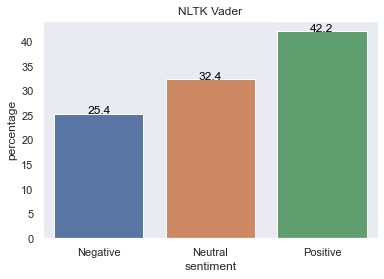

In [47]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="sentiment_textblob"></a>
## Part 3B - Sentiment Analysis with TextBlob
TextBlob is a popular Python library used to process textual data and perform a range of NLP tasks including sentiment analysis. Similar to NLTK Vader, the TextBlob sentiment classifier is also based on a bag of words approach. In fact, TextBlob is built upon the NLTK and pattern libraries.

This is the command to install TextBlob: `pip install textblob`

The NaiveBayesAnalyzer is trained on movies review dataset, so I will be using the default PatternAnalyzer instead

In [48]:
# Obtain polarity scores generated by TextBlob
tweets_df['textblob_score'] = tweets_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [49]:
neutral_thresh = 0.05

In [50]:
# Convert polarity score into sentiment categories
tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

# Neutral score = 0
#tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c > 0 else ('Negative' if c < 0 else 'Neutral'))

In [51]:
tweets_df['textblob_score'].describe()

count    10727.000000
mean         0.111627
std          0.225055
min         -1.000000
25%          0.000000
50%          0.031818
75%          0.250000
max          1.000000
Name: textblob_score, dtype: float64

In [52]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob')
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,1275,11.89,TextBlob
1,Neutral,4250,39.62,TextBlob
2,Positive,5202,48.49,TextBlob


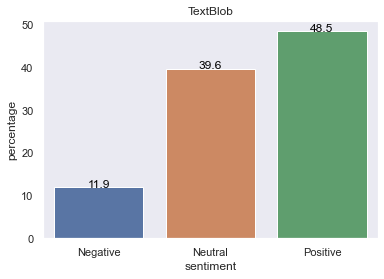

In [53]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="sentiment_stanza"></a>
## Part 3C - Sentiment Analysis with Stanza
Stanza is the default Python NLP library of the Stanford NLP Group, replacing the older Java-based CoreNLP. The modules are built on top of PyTorch, and its pre-built sentiment analyzer is trained on several datasets, including the Stanford Sentiment Treeback and Airline Twitter Sentiment.

Score mapping:  
0: Negative  
1: Neutral  
2: Positive

In [54]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

2021-01-25 22:14:07 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |

2021-01-25 22:14:07 INFO: Use device: cpu
2021-01-25 22:14:07 INFO: Loading: tokenize
2021-01-25 22:14:07 INFO: Loading: sentiment
2021-01-25 22:14:08 INFO: Done loading processors!


In [55]:
def stanza_analyze(Text):
    document = nlp(Text)
    print('Processing')
    return np.mean([(i.sentiment - 1) for i in document.sentences]) # Minus 1 so as to bring score range of [0,2] to [-1,1]

In [56]:
# Obtain sentiment categorical score generated by Stanza
tweets_df['stanza_score'] = tweets_df['text_cleaned'].apply(lambda x: stanza_analyze(x))

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

In [57]:
tweets_df['stanza_score'].describe()

count    10727.000000
mean        -0.205967
std          0.524184
min         -1.000000
25%         -0.500000
50%          0.000000
75%          0.000000
max          1.000000
Name: stanza_score, dtype: float64

In [58]:
neutral_thresh = 0.05

In [59]:
# Convert average Stanza sentiment score into sentiment categories
tweets_df['stanza_sentiment'] = tweets_df['stanza_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [60]:
stanza_sentiment_df = get_value_counts('stanza_sentiment','Stanza')
stanza_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,4574,42.64,Stanza
1,Neutral,4640,43.26,Stanza
2,Positive,1513,14.10,Stanza


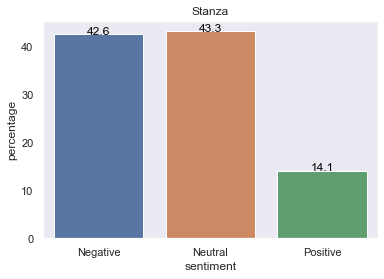

In [61]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=stanza_sentiment_df)
ax.set_title('Stanza')

for index, row in stanza_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
Note: Other libraries (i.e. FlairNLP (Part 3D) and Stanford CoreNLP (Part 3E)) were also explored. FlairNLP was omitted from analysis as it does not give Neutral classification. Stanford CoreNLP was omitted from analysis as it has been replaced by Stanza as Stanford NLP Group's default NLP library.

___
<a name="sentiment_flair"></a>
## Part 3D - Sentiment Analysis with FlairNLP
Flair pretrained sentiment analysis model is trained on IMDB movie reviews dataset

In [71]:
flair_clf = TextClassifier.load('en-sentiment')

2021-01-25 23:00:18,551 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to C:\Users\kenne\AppData\Local\Temp\tmpstk_miqg


100%|█████████████████████████████████████████████████████████████████| 266147697/266147697 [21:18<00:00, 208171.57B/s]

2021-01-25 23:21:38,190 copying C:\Users\kenne\AppData\Local\Temp\tmpstk_miqg to cache at C:\Users\kenne\.flair\models\sentiment-en-mix-distillbert_3.1.pt


2021-01-25 23:21:38,679 removing temp file C:\Users\kenne\AppData\Local\Temp\tmpstk_miqg
2021-01-25 23:21:38,752 loading file C:\Users\kenne\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [72]:
# Create function to run flair sentiment analyzer
def flair_analyze(Text):
    sentence = Sentence(Text)
    flair_clf.predict(sentence)
    flair_senti = sentence.labels
    return flair_senti

In [73]:
# Obtain sentiment scores generated by FlairNLP
tweets_df['flair_output'] = tweets_df['text_cleaned'].apply(lambda x: flair_analyze(x))

In [74]:
tweets_df['flair_output'] = tweets_df['flair_output'].astype(str)

In [75]:
def extract_flair_senti(output):
    sentiment = " ".join(re.findall("[a-zA-Z]+", output))
    sentiment = sentiment.capitalize()
    return sentiment

def extract_flair_score(output):
    score = ".".join(re.findall(r"\d+", output)) 
    return score

In [76]:
# Get flair sentiment and polarity score
tweets_df['flair_sentiment'] = tweets_df['flair_output'].apply(lambda x:extract_flair_senti(x))
tweets_df['flair_score'] = tweets_df['flair_output'].apply(lambda x:extract_flair_score(x))

In [77]:
flair_sentiment_df = get_value_counts('flair_sentiment','Flair')
flair_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,6555,61.11,Flair
1,Positive,4172,38.89,Flair


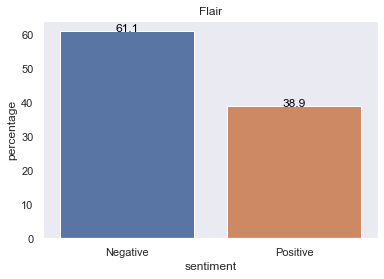

In [78]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=flair_sentiment_df)
ax.set_title('Flair')

for index, row in flair_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="sentiment_corenlp"></a>
## Part 3E- Sentiment Analysis with Stanford CoreNLP

**IMPORTANT NOTE:  
Instead of CoreNLP, Stanza (https://stanfordnlp.github.io/stanza/#getting-started) is now Stanford NLP Group's official Python NLP library**

See this article for detailed CoreNLP setup for all OS: https://towardsdatascience.com/natural-language-processing-using-stanfords-corenlp-d9e64c1e1024

The steps I took (for my Windows system) were:  

1. Download CoreNLP package files from http://nlp.stanford.edu/software/stanford-corenlp-latest.zip  

2. Unzip the zip file and note the path where these files are stored (e.g. `D:\Program Files\stanford-corenlp-4.2.0`)  

3. Open Command Prompt and change the directory to where the files are (i.e. `cd 'D:\Program Files\stanford-corenlp-4.2.0'`)  

4. Run the following: `java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000`

5. Lastly, `pip install pycorenlp`

Official Stanford CoreNLP site: https://stanfordnlp.github.io/CoreNLP/download.html#steps-to-setup-from-the-official-release

In [79]:
nlp = StanfordCoreNLP('http://localhost:9000')

For nlp output, the sentiment outputs are 'sentiment', 'sentimentValue' and 'sentimentDistribution'. "sentimentDistribution" returns an array of the probabilities of each of the 5 sentiments

In [80]:
def get_sentiment_score(text):
    output = nlp.annotate(text,
                          properties={'annotators': 'sentiment',
                                      'outputFormat': 'json',
                                      'timeout': 100000,
                       })
    
    return (output['sentences'][0]['sentimentValue'])

In [81]:
corenlp_senti_scores = []

for i in range(len(tweets_df)):
    sentiment = get_sentiment_score(tweets_df['text_cleaned'][i]) 
    corenlp_senti_scores.append(sentiment)
    print(f"Processed row {i}")

Processed row 0
Processed row 1
Processed row 2
Processed row 3
Processed row 4
Processed row 5
Processed row 6
Processed row 7
Processed row 8
Processed row 9
Processed row 10
Processed row 11
Processed row 12
Processed row 13
Processed row 14
Processed row 15
Processed row 16
Processed row 17
Processed row 18
Processed row 19
Processed row 20
Processed row 21
Processed row 22
Processed row 23
Processed row 24
Processed row 25
Processed row 26
Processed row 27
Processed row 28
Processed row 29
Processed row 30
Processed row 31
Processed row 32
Processed row 33
Processed row 34
Processed row 35
Processed row 36
Processed row 37
Processed row 38
Processed row 39
Processed row 40
Processed row 41
Processed row 42
Processed row 43
Processed row 44
Processed row 45
Processed row 46
Processed row 47
Processed row 48
Processed row 49
Processed row 50
Processed row 51
Processed row 52
Processed row 53
Processed row 54
Processed row 55
Processed row 56
Processed row 57
Processed row 58
Process

Processed row 462
Processed row 463
Processed row 464
Processed row 465
Processed row 466
Processed row 467
Processed row 468
Processed row 469
Processed row 470
Processed row 471
Processed row 472
Processed row 473
Processed row 474
Processed row 475
Processed row 476
Processed row 477
Processed row 478
Processed row 479
Processed row 480
Processed row 481
Processed row 482
Processed row 483
Processed row 484
Processed row 485
Processed row 486
Processed row 487
Processed row 488
Processed row 489
Processed row 490
Processed row 491
Processed row 492
Processed row 493
Processed row 494
Processed row 495
Processed row 496
Processed row 497
Processed row 498
Processed row 499
Processed row 500
Processed row 501
Processed row 502
Processed row 503
Processed row 504
Processed row 505
Processed row 506
Processed row 507
Processed row 508
Processed row 509
Processed row 510
Processed row 511
Processed row 512
Processed row 513
Processed row 514
Processed row 515
Processed row 516
Processed 

Processed row 918
Processed row 919
Processed row 920
Processed row 921
Processed row 922
Processed row 923
Processed row 924
Processed row 925
Processed row 926
Processed row 927
Processed row 928
Processed row 929
Processed row 930
Processed row 931
Processed row 932
Processed row 933
Processed row 934
Processed row 935
Processed row 936
Processed row 937
Processed row 938
Processed row 939
Processed row 940
Processed row 941
Processed row 942
Processed row 943
Processed row 944
Processed row 945
Processed row 946
Processed row 947
Processed row 948
Processed row 949
Processed row 950
Processed row 951
Processed row 952
Processed row 953
Processed row 954
Processed row 955
Processed row 956
Processed row 957
Processed row 958
Processed row 959
Processed row 960
Processed row 961
Processed row 962
Processed row 963
Processed row 964
Processed row 965
Processed row 966
Processed row 967
Processed row 968
Processed row 969
Processed row 970
Processed row 971
Processed row 972
Processed 

Processed row 1356
Processed row 1357
Processed row 1358
Processed row 1359
Processed row 1360
Processed row 1361
Processed row 1362
Processed row 1363
Processed row 1364
Processed row 1365
Processed row 1366
Processed row 1367
Processed row 1368
Processed row 1369
Processed row 1370
Processed row 1371
Processed row 1372
Processed row 1373
Processed row 1374
Processed row 1375
Processed row 1376
Processed row 1377
Processed row 1378
Processed row 1379
Processed row 1380
Processed row 1381
Processed row 1382
Processed row 1383
Processed row 1384
Processed row 1385
Processed row 1386
Processed row 1387
Processed row 1388
Processed row 1389
Processed row 1390
Processed row 1391
Processed row 1392
Processed row 1393
Processed row 1394
Processed row 1395
Processed row 1396
Processed row 1397
Processed row 1398
Processed row 1399
Processed row 1400
Processed row 1401
Processed row 1402
Processed row 1403
Processed row 1404
Processed row 1405
Processed row 1406
Processed row 1407
Processed ro

Processed row 1788
Processed row 1789
Processed row 1790
Processed row 1791
Processed row 1792
Processed row 1793
Processed row 1794
Processed row 1795
Processed row 1796
Processed row 1797
Processed row 1798
Processed row 1799
Processed row 1800
Processed row 1801
Processed row 1802
Processed row 1803
Processed row 1804
Processed row 1805
Processed row 1806
Processed row 1807
Processed row 1808
Processed row 1809
Processed row 1810
Processed row 1811
Processed row 1812
Processed row 1813
Processed row 1814
Processed row 1815
Processed row 1816
Processed row 1817
Processed row 1818
Processed row 1819
Processed row 1820
Processed row 1821
Processed row 1822
Processed row 1823
Processed row 1824
Processed row 1825
Processed row 1826
Processed row 1827
Processed row 1828
Processed row 1829
Processed row 1830
Processed row 1831
Processed row 1832
Processed row 1833
Processed row 1834
Processed row 1835
Processed row 1836
Processed row 1837
Processed row 1838
Processed row 1839
Processed ro

Processed row 2221
Processed row 2222
Processed row 2223
Processed row 2224
Processed row 2225
Processed row 2226
Processed row 2227
Processed row 2228
Processed row 2229
Processed row 2230
Processed row 2231
Processed row 2232
Processed row 2233
Processed row 2234
Processed row 2235
Processed row 2236
Processed row 2237
Processed row 2238
Processed row 2239
Processed row 2240
Processed row 2241
Processed row 2242
Processed row 2243
Processed row 2244
Processed row 2245
Processed row 2246
Processed row 2247
Processed row 2248
Processed row 2249
Processed row 2250
Processed row 2251
Processed row 2252
Processed row 2253
Processed row 2254
Processed row 2255
Processed row 2256
Processed row 2257
Processed row 2258
Processed row 2259
Processed row 2260
Processed row 2261
Processed row 2262
Processed row 2263
Processed row 2264
Processed row 2265
Processed row 2266
Processed row 2267
Processed row 2268
Processed row 2269
Processed row 2270
Processed row 2271
Processed row 2272
Processed ro

Processed row 2656
Processed row 2657
Processed row 2658
Processed row 2659
Processed row 2660
Processed row 2661
Processed row 2662
Processed row 2663
Processed row 2664
Processed row 2665
Processed row 2666
Processed row 2667
Processed row 2668
Processed row 2669
Processed row 2670
Processed row 2671
Processed row 2672
Processed row 2673
Processed row 2674
Processed row 2675
Processed row 2676
Processed row 2677
Processed row 2678
Processed row 2679
Processed row 2680
Processed row 2681
Processed row 2682
Processed row 2683
Processed row 2684
Processed row 2685
Processed row 2686
Processed row 2687
Processed row 2688
Processed row 2689
Processed row 2690
Processed row 2691
Processed row 2692
Processed row 2693
Processed row 2694
Processed row 2695
Processed row 2696
Processed row 2697
Processed row 2698
Processed row 2699
Processed row 2700
Processed row 2701
Processed row 2702
Processed row 2703
Processed row 2704
Processed row 2705
Processed row 2706
Processed row 2707
Processed ro

Processed row 3088
Processed row 3089
Processed row 3090
Processed row 3091
Processed row 3092
Processed row 3093
Processed row 3094
Processed row 3095
Processed row 3096
Processed row 3097
Processed row 3098
Processed row 3099
Processed row 3100
Processed row 3101
Processed row 3102
Processed row 3103
Processed row 3104
Processed row 3105
Processed row 3106
Processed row 3107
Processed row 3108
Processed row 3109
Processed row 3110
Processed row 3111
Processed row 3112
Processed row 3113
Processed row 3114
Processed row 3115
Processed row 3116
Processed row 3117
Processed row 3118
Processed row 3119
Processed row 3120
Processed row 3121
Processed row 3122
Processed row 3123
Processed row 3124
Processed row 3125
Processed row 3126
Processed row 3127
Processed row 3128
Processed row 3129
Processed row 3130
Processed row 3131
Processed row 3132
Processed row 3133
Processed row 3134
Processed row 3135
Processed row 3136
Processed row 3137
Processed row 3138
Processed row 3139
Processed ro

Processed row 3521
Processed row 3522
Processed row 3523
Processed row 3524
Processed row 3525
Processed row 3526
Processed row 3527
Processed row 3528
Processed row 3529
Processed row 3530
Processed row 3531
Processed row 3532
Processed row 3533
Processed row 3534
Processed row 3535
Processed row 3536
Processed row 3537
Processed row 3538
Processed row 3539
Processed row 3540
Processed row 3541
Processed row 3542
Processed row 3543
Processed row 3544
Processed row 3545
Processed row 3546
Processed row 3547
Processed row 3548
Processed row 3549
Processed row 3550
Processed row 3551
Processed row 3552
Processed row 3553
Processed row 3554
Processed row 3555
Processed row 3556
Processed row 3557
Processed row 3558
Processed row 3559
Processed row 3560
Processed row 3561
Processed row 3562
Processed row 3563
Processed row 3564
Processed row 3565
Processed row 3566
Processed row 3567
Processed row 3568
Processed row 3569
Processed row 3570
Processed row 3571
Processed row 3572
Processed ro

Processed row 3953
Processed row 3954
Processed row 3955
Processed row 3956
Processed row 3957
Processed row 3958
Processed row 3959
Processed row 3960
Processed row 3961
Processed row 3962
Processed row 3963
Processed row 3964
Processed row 3965
Processed row 3966
Processed row 3967
Processed row 3968
Processed row 3969
Processed row 3970
Processed row 3971
Processed row 3972
Processed row 3973
Processed row 3974
Processed row 3975
Processed row 3976
Processed row 3977
Processed row 3978
Processed row 3979
Processed row 3980
Processed row 3981
Processed row 3982
Processed row 3983
Processed row 3984
Processed row 3985
Processed row 3986
Processed row 3987
Processed row 3988
Processed row 3989
Processed row 3990
Processed row 3991
Processed row 3992
Processed row 3993
Processed row 3994
Processed row 3995
Processed row 3996
Processed row 3997
Processed row 3998
Processed row 3999
Processed row 4000
Processed row 4001
Processed row 4002
Processed row 4003
Processed row 4004
Processed ro

Processed row 4385
Processed row 4386
Processed row 4387
Processed row 4388
Processed row 4389
Processed row 4390
Processed row 4391
Processed row 4392
Processed row 4393
Processed row 4394
Processed row 4395
Processed row 4396
Processed row 4397
Processed row 4398
Processed row 4399
Processed row 4400
Processed row 4401
Processed row 4402
Processed row 4403
Processed row 4404
Processed row 4405
Processed row 4406
Processed row 4407
Processed row 4408
Processed row 4409
Processed row 4410
Processed row 4411
Processed row 4412
Processed row 4413
Processed row 4414
Processed row 4415
Processed row 4416
Processed row 4417
Processed row 4418
Processed row 4419
Processed row 4420
Processed row 4421
Processed row 4422
Processed row 4423
Processed row 4424
Processed row 4425
Processed row 4426
Processed row 4427
Processed row 4428
Processed row 4429
Processed row 4430
Processed row 4431
Processed row 4432
Processed row 4433
Processed row 4434
Processed row 4435
Processed row 4436
Processed ro

Processed row 4818
Processed row 4819
Processed row 4820
Processed row 4821
Processed row 4822
Processed row 4823
Processed row 4824
Processed row 4825
Processed row 4826
Processed row 4827
Processed row 4828
Processed row 4829
Processed row 4830
Processed row 4831
Processed row 4832
Processed row 4833
Processed row 4834
Processed row 4835
Processed row 4836
Processed row 4837
Processed row 4838
Processed row 4839
Processed row 4840
Processed row 4841
Processed row 4842
Processed row 4843
Processed row 4844
Processed row 4845
Processed row 4846
Processed row 4847
Processed row 4848
Processed row 4849
Processed row 4850
Processed row 4851
Processed row 4852
Processed row 4853
Processed row 4854
Processed row 4855
Processed row 4856
Processed row 4857
Processed row 4858
Processed row 4859
Processed row 4860
Processed row 4861
Processed row 4862
Processed row 4863
Processed row 4864
Processed row 4865
Processed row 4866
Processed row 4867
Processed row 4868
Processed row 4869
Processed ro

Processed row 5252
Processed row 5253
Processed row 5254
Processed row 5255
Processed row 5256
Processed row 5257
Processed row 5258
Processed row 5259
Processed row 5260
Processed row 5261
Processed row 5262
Processed row 5263
Processed row 5264
Processed row 5265
Processed row 5266
Processed row 5267
Processed row 5268
Processed row 5269
Processed row 5270
Processed row 5271
Processed row 5272
Processed row 5273
Processed row 5274
Processed row 5275
Processed row 5276
Processed row 5277
Processed row 5278
Processed row 5279
Processed row 5280
Processed row 5281
Processed row 5282
Processed row 5283
Processed row 5284
Processed row 5285
Processed row 5286
Processed row 5287
Processed row 5288
Processed row 5289
Processed row 5290
Processed row 5291
Processed row 5292
Processed row 5293
Processed row 5294
Processed row 5295
Processed row 5296
Processed row 5297
Processed row 5298
Processed row 5299
Processed row 5300
Processed row 5301
Processed row 5302
Processed row 5303
Processed ro

Processed row 5686
Processed row 5687
Processed row 5688
Processed row 5689
Processed row 5690
Processed row 5691
Processed row 5692
Processed row 5693
Processed row 5694
Processed row 5695
Processed row 5696
Processed row 5697
Processed row 5698
Processed row 5699
Processed row 5700
Processed row 5701
Processed row 5702
Processed row 5703
Processed row 5704
Processed row 5705
Processed row 5706
Processed row 5707
Processed row 5708
Processed row 5709
Processed row 5710
Processed row 5711
Processed row 5712
Processed row 5713
Processed row 5714
Processed row 5715
Processed row 5716
Processed row 5717
Processed row 5718
Processed row 5719
Processed row 5720
Processed row 5721
Processed row 5722
Processed row 5723
Processed row 5724
Processed row 5725
Processed row 5726
Processed row 5727
Processed row 5728
Processed row 5729
Processed row 5730
Processed row 5731
Processed row 5732
Processed row 5733
Processed row 5734
Processed row 5735
Processed row 5736
Processed row 5737
Processed ro

Processed row 6119
Processed row 6120
Processed row 6121
Processed row 6122
Processed row 6123
Processed row 6124
Processed row 6125
Processed row 6126
Processed row 6127
Processed row 6128
Processed row 6129
Processed row 6130
Processed row 6131
Processed row 6132
Processed row 6133
Processed row 6134
Processed row 6135
Processed row 6136
Processed row 6137
Processed row 6138
Processed row 6139
Processed row 6140
Processed row 6141
Processed row 6142
Processed row 6143
Processed row 6144
Processed row 6145
Processed row 6146
Processed row 6147
Processed row 6148
Processed row 6149
Processed row 6150
Processed row 6151
Processed row 6152
Processed row 6153
Processed row 6154
Processed row 6155
Processed row 6156
Processed row 6157
Processed row 6158
Processed row 6159
Processed row 6160
Processed row 6161
Processed row 6162
Processed row 6163
Processed row 6164
Processed row 6165
Processed row 6166
Processed row 6167
Processed row 6168
Processed row 6169
Processed row 6170
Processed ro

Processed row 6552
Processed row 6553
Processed row 6554
Processed row 6555
Processed row 6556
Processed row 6557
Processed row 6558
Processed row 6559
Processed row 6560
Processed row 6561
Processed row 6562
Processed row 6563
Processed row 6564
Processed row 6565
Processed row 6566
Processed row 6567
Processed row 6568
Processed row 6569
Processed row 6570
Processed row 6571
Processed row 6572
Processed row 6573
Processed row 6574
Processed row 6575
Processed row 6576
Processed row 6577
Processed row 6578
Processed row 6579
Processed row 6580
Processed row 6581
Processed row 6582
Processed row 6583
Processed row 6584
Processed row 6585
Processed row 6586
Processed row 6587
Processed row 6588
Processed row 6589
Processed row 6590
Processed row 6591
Processed row 6592
Processed row 6593
Processed row 6594
Processed row 6595
Processed row 6596
Processed row 6597
Processed row 6598
Processed row 6599
Processed row 6600
Processed row 6601
Processed row 6602
Processed row 6603
Processed ro

Processed row 6984
Processed row 6985
Processed row 6986
Processed row 6987
Processed row 6988
Processed row 6989
Processed row 6990
Processed row 6991
Processed row 6992
Processed row 6993
Processed row 6994
Processed row 6995
Processed row 6996
Processed row 6997
Processed row 6998
Processed row 6999
Processed row 7000
Processed row 7001
Processed row 7002
Processed row 7003
Processed row 7004
Processed row 7005
Processed row 7006
Processed row 7007
Processed row 7008
Processed row 7009
Processed row 7010
Processed row 7011
Processed row 7012
Processed row 7013
Processed row 7014
Processed row 7015
Processed row 7016
Processed row 7017
Processed row 7018
Processed row 7019
Processed row 7020
Processed row 7021
Processed row 7022
Processed row 7023
Processed row 7024
Processed row 7025
Processed row 7026
Processed row 7027
Processed row 7028
Processed row 7029
Processed row 7030
Processed row 7031
Processed row 7032
Processed row 7033
Processed row 7034
Processed row 7035
Processed ro

Processed row 7416
Processed row 7417
Processed row 7418
Processed row 7419
Processed row 7420
Processed row 7421
Processed row 7422
Processed row 7423
Processed row 7424
Processed row 7425
Processed row 7426
Processed row 7427
Processed row 7428
Processed row 7429
Processed row 7430
Processed row 7431
Processed row 7432
Processed row 7433
Processed row 7434
Processed row 7435
Processed row 7436
Processed row 7437
Processed row 7438
Processed row 7439
Processed row 7440
Processed row 7441
Processed row 7442
Processed row 7443
Processed row 7444
Processed row 7445
Processed row 7446
Processed row 7447
Processed row 7448
Processed row 7449
Processed row 7450
Processed row 7451
Processed row 7452
Processed row 7453
Processed row 7454
Processed row 7455
Processed row 7456
Processed row 7457
Processed row 7458
Processed row 7459
Processed row 7460
Processed row 7461
Processed row 7462
Processed row 7463
Processed row 7464
Processed row 7465
Processed row 7466
Processed row 7467
Processed ro

Processed row 7848
Processed row 7849
Processed row 7850
Processed row 7851
Processed row 7852
Processed row 7853
Processed row 7854
Processed row 7855
Processed row 7856
Processed row 7857
Processed row 7858
Processed row 7859
Processed row 7860
Processed row 7861
Processed row 7862
Processed row 7863
Processed row 7864
Processed row 7865
Processed row 7866
Processed row 7867
Processed row 7868
Processed row 7869
Processed row 7870
Processed row 7871
Processed row 7872
Processed row 7873
Processed row 7874
Processed row 7875
Processed row 7876
Processed row 7877
Processed row 7878
Processed row 7879
Processed row 7880
Processed row 7881
Processed row 7882
Processed row 7883
Processed row 7884
Processed row 7885
Processed row 7886
Processed row 7887
Processed row 7888
Processed row 7889
Processed row 7890
Processed row 7891
Processed row 7892
Processed row 7893
Processed row 7894
Processed row 7895
Processed row 7896
Processed row 7897
Processed row 7898
Processed row 7899
Processed ro

Processed row 8281
Processed row 8282
Processed row 8283
Processed row 8284
Processed row 8285
Processed row 8286
Processed row 8287
Processed row 8288
Processed row 8289
Processed row 8290
Processed row 8291
Processed row 8292
Processed row 8293
Processed row 8294
Processed row 8295
Processed row 8296
Processed row 8297
Processed row 8298
Processed row 8299
Processed row 8300
Processed row 8301
Processed row 8302
Processed row 8303
Processed row 8304
Processed row 8305
Processed row 8306
Processed row 8307
Processed row 8308
Processed row 8309
Processed row 8310
Processed row 8311
Processed row 8312
Processed row 8313
Processed row 8314
Processed row 8315
Processed row 8316
Processed row 8317
Processed row 8318
Processed row 8319
Processed row 8320
Processed row 8321
Processed row 8322
Processed row 8323
Processed row 8324
Processed row 8325
Processed row 8326
Processed row 8327
Processed row 8328
Processed row 8329
Processed row 8330
Processed row 8331
Processed row 8332
Processed ro

Processed row 8714
Processed row 8715
Processed row 8716
Processed row 8717
Processed row 8718
Processed row 8719
Processed row 8720
Processed row 8721
Processed row 8722
Processed row 8723
Processed row 8724
Processed row 8725
Processed row 8726
Processed row 8727
Processed row 8728
Processed row 8729
Processed row 8730
Processed row 8731
Processed row 8732
Processed row 8733
Processed row 8734
Processed row 8735
Processed row 8736
Processed row 8737
Processed row 8738
Processed row 8739
Processed row 8740
Processed row 8741
Processed row 8742
Processed row 8743
Processed row 8744
Processed row 8745
Processed row 8746
Processed row 8747
Processed row 8748
Processed row 8749
Processed row 8750
Processed row 8751
Processed row 8752
Processed row 8753
Processed row 8754
Processed row 8755
Processed row 8756
Processed row 8757
Processed row 8758
Processed row 8759
Processed row 8760
Processed row 8761
Processed row 8762
Processed row 8763
Processed row 8764
Processed row 8765
Processed ro

Processed row 9147
Processed row 9148
Processed row 9149
Processed row 9150
Processed row 9151
Processed row 9152
Processed row 9153
Processed row 9154
Processed row 9155
Processed row 9156
Processed row 9157
Processed row 9158
Processed row 9159
Processed row 9160
Processed row 9161
Processed row 9162
Processed row 9163
Processed row 9164
Processed row 9165
Processed row 9166
Processed row 9167
Processed row 9168
Processed row 9169
Processed row 9170
Processed row 9171
Processed row 9172
Processed row 9173
Processed row 9174
Processed row 9175
Processed row 9176
Processed row 9177
Processed row 9178
Processed row 9179
Processed row 9180
Processed row 9181
Processed row 9182
Processed row 9183
Processed row 9184
Processed row 9185
Processed row 9186
Processed row 9187
Processed row 9188
Processed row 9189
Processed row 9190
Processed row 9191
Processed row 9192
Processed row 9193
Processed row 9194
Processed row 9195
Processed row 9196
Processed row 9197
Processed row 9198
Processed ro

Processed row 9579
Processed row 9580
Processed row 9581
Processed row 9582
Processed row 9583
Processed row 9584
Processed row 9585
Processed row 9586
Processed row 9587
Processed row 9588
Processed row 9589
Processed row 9590
Processed row 9591
Processed row 9592
Processed row 9593
Processed row 9594
Processed row 9595
Processed row 9596
Processed row 9597
Processed row 9598
Processed row 9599
Processed row 9600
Processed row 9601
Processed row 9602
Processed row 9603
Processed row 9604
Processed row 9605
Processed row 9606
Processed row 9607
Processed row 9608
Processed row 9609
Processed row 9610
Processed row 9611
Processed row 9612
Processed row 9613
Processed row 9614
Processed row 9615
Processed row 9616
Processed row 9617
Processed row 9618
Processed row 9619
Processed row 9620
Processed row 9621
Processed row 9622
Processed row 9623
Processed row 9624
Processed row 9625
Processed row 9626
Processed row 9627
Processed row 9628
Processed row 9629
Processed row 9630
Processed ro

Processed row 10013
Processed row 10014
Processed row 10015
Processed row 10016
Processed row 10017
Processed row 10018
Processed row 10019
Processed row 10020
Processed row 10021
Processed row 10022
Processed row 10023
Processed row 10024
Processed row 10025
Processed row 10026
Processed row 10027
Processed row 10028
Processed row 10029
Processed row 10030
Processed row 10031
Processed row 10032
Processed row 10033
Processed row 10034
Processed row 10035
Processed row 10036
Processed row 10037
Processed row 10038
Processed row 10039
Processed row 10040
Processed row 10041
Processed row 10042
Processed row 10043
Processed row 10044
Processed row 10045
Processed row 10046
Processed row 10047
Processed row 10048
Processed row 10049
Processed row 10050
Processed row 10051
Processed row 10052
Processed row 10053
Processed row 10054
Processed row 10055
Processed row 10056
Processed row 10057
Processed row 10058
Processed row 10059
Processed row 10060
Processed row 10061
Processed row 10062


Processed row 10423
Processed row 10424
Processed row 10425
Processed row 10426
Processed row 10427
Processed row 10428
Processed row 10429
Processed row 10430
Processed row 10431
Processed row 10432
Processed row 10433
Processed row 10434
Processed row 10435
Processed row 10436
Processed row 10437
Processed row 10438
Processed row 10439
Processed row 10440
Processed row 10441
Processed row 10442
Processed row 10443
Processed row 10444
Processed row 10445
Processed row 10446
Processed row 10447
Processed row 10448
Processed row 10449
Processed row 10450
Processed row 10451
Processed row 10452
Processed row 10453
Processed row 10454
Processed row 10455
Processed row 10456
Processed row 10457
Processed row 10458
Processed row 10459
Processed row 10460
Processed row 10461
Processed row 10462
Processed row 10463
Processed row 10464
Processed row 10465
Processed row 10466
Processed row 10467
Processed row 10468
Processed row 10469
Processed row 10470
Processed row 10471
Processed row 10472


In [82]:
corenlp_senti_scores_df = pd.DataFrame(corenlp_senti_scores, columns = ["corenlp_score"])
corenlp_senti_scores_df["corenlp_score"] = pd.to_numeric(corenlp_senti_scores_df["corenlp_score"])
corenlp_senti_scores_df["corenlp_score"].unique()

array([2, 1, 3, 4, 0], dtype=int64)

These CoreNLP scores correspond to the following:  
0: Very Negative  
1: Negative  
2: Neutral  
3: Positive  
4: Very Positive

In [83]:
# Concatenate both dataframes
tweets_df = pd.concat([tweets_df, corenlp_senti_scores_df], axis=1)

# Map CoreNLP sentiments to scores
corenlp_mapping = {0:'Negative',1:'Negative',2:'Neutral',3:'Positive',4:'Positive'}

tweets_df['corenlp_sentiment'] = tweets_df['corenlp_score'].map(corenlp_mapping)

In [84]:
corenlp_sentiment_df = get_value_counts('corenlp_sentiment','CoreNLP')
corenlp_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,2858,26.64,CoreNLP
1,Neutral,5989,55.83,CoreNLP
2,Positive,1880,17.53,CoreNLP


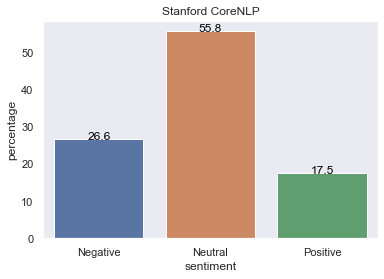

In [85]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=corenlp_sentiment_df)
ax.set_title('Stanford CoreNLP')

for index, row in corenlp_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

___
<a name="insights"></a>
## Part 4 - Insights from Sentiment Analyses
We will focus on the results from NLTK VADER, TextBlob and Stanza because they are:
- Trained on at least 1 social media dataset
- Able to give at least 3 classes of sentiments i.e. Positive, Neutral, Negative

In [62]:
df_sentiments = pd.concat([nltk_sentiment_df, 
                           textblob_sentiment_df, 
                           stanza_sentiment_df,
                           #flair_sentiment_df,
                           #corenlp_sentiment_df,
                          ]).reset_index(drop=True)
df_sentiments

,sentiment,counts,percentage,analyzer
0,Negative,2727,25.42,NLTK Vader
1,Neutral,3473,32.38,NLTK Vader
2,Positive,4527,42.20,NLTK Vader
3,Negative,1275,11.89,TextBlob
4,Neutral,4250,39.62,TextBlob
5,Positive,5202,48.49,TextBlob
6,Negative,4574,42.64,Stanza
7,Neutral,4640,43.26,Stanza
8,Positive,1513,14.10,Stanza


In [63]:
df_sentiments_pivot = df_sentiments.pivot(index='sentiment', columns='analyzer', values='percentage')
df_sentiments_pivot

analyzer,NLTK Vader,Stanza,TextBlob
sentiment,,,
Negative,25.42,42.64,11.89
Neutral,32.38,43.26,39.62
Positive,42.20,14.10,48.49


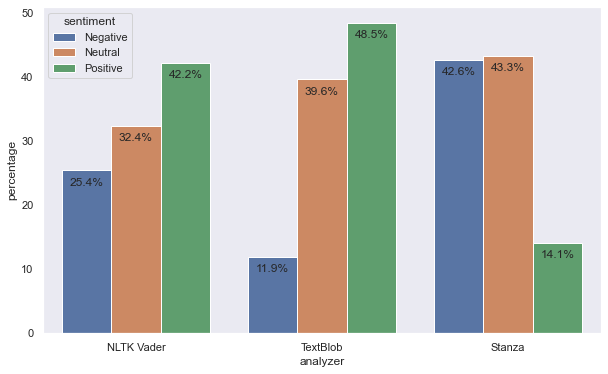

In [64]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=df_sentiments)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

___
<a name="ensemble"></a>
## Part 5 - Composite Sentiment with Ensemble Method

#### Average Score
- Take average of the 3 sentiment scores of NLTK Vader, TextBlob and Stanza

In [65]:
# Make use of sentiments from NLTK Vader, TextBlob and Stanza
tweets_df['composite_score'] =  (tweets_df['nltk_cmp_score'] 
                                + tweets_df['textblob_score']
                                + tweets_df['stanza_score'])/3

In [66]:
tweets_df['composite_score'].describe()

count    10727.000000
mean        -0.002456
std          0.306787
min         -0.923900
25%         -0.215383
50%          0.000000
75%          0.166667
max          0.935667
Name: composite_score, dtype: float64

In [67]:
# Threshold for neutral sentiment
neutral_thresh = 0.05

In [68]:
# Convert average sentiment score (from all 3 analyzers) into sentiment categories
tweets_df['composite_vote_2'] = tweets_df['composite_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [69]:
composite_sentiment_df_2 = get_value_counts('composite_vote_2','Composite Sentiment')
composite_sentiment_df_2

,sentiment,counts,percentage,analyzer
0,Negative,4122,38.43,Composite Sentiment
1,Neutral,2316,21.59,Composite Sentiment
2,Positive,4289,39.98,Composite Sentiment


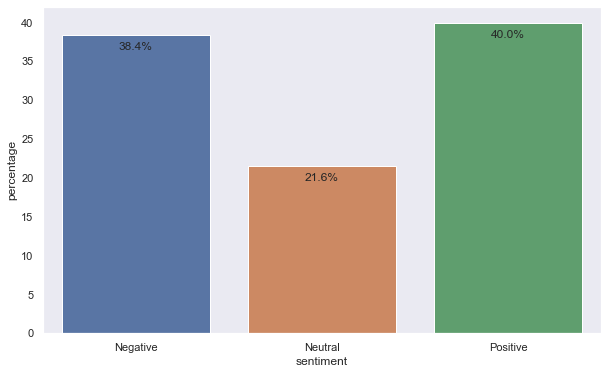

In [70]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sentiment", y="percentage",
                 data=composite_sentiment_df_2)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

___
#### Experiment: Max Voting
- Get composite sentiment by doing max voting amongst the 3 analyzers NLTK Vader, TextBlob and Stanza

In [86]:
# Make use of sentiments from NLTK Vader, TextBlob and Stanza
tweets_df['sentiment_votes'] =  tweets_df.apply(lambda x: list([x['nltk_sentiment'], 
                                                                x['textblob_sentiment'], 
                                                                x['stanza_sentiment']]),axis=1) 

In [87]:
# Create function to get sentiment that appears most often amongst the 3 votes
def get_most_voted_senti(List):
    if len(List) == len(set(List)): # If all elements are different
        return 'Neutral'
    else:
        return max(set(List), key = List.count)

In [88]:
# Get composite sentiment vote
tweets_df['composite_vote'] = tweets_df['sentiment_votes'].apply(lambda x: get_most_voted_senti(x))

In [89]:
composite_sentiment_df = get_value_counts('composite_vote','Composite Sentiment (Max Voting)')
composite_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,2492,23.23,Composite Sentiment (Max Voting)
1,Neutral,4916,45.83,Composite Sentiment (Max Voting)
2,Positive,3319,30.94,Composite Sentiment (Max Voting)


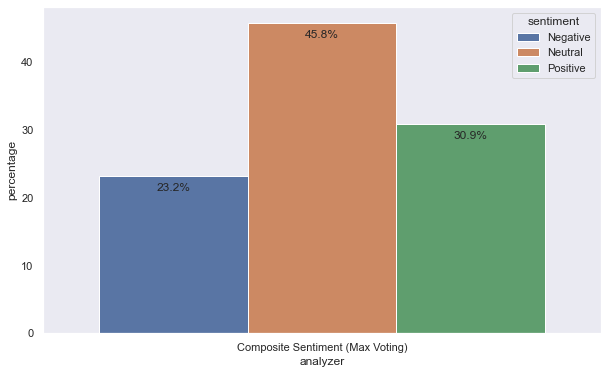

In [90]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=composite_sentiment_df)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

___
Feel free to check out the rest of my GitHub projects (https://github.com/kennethleungty) and Medium articles (https://kennethleungty.medium.com)